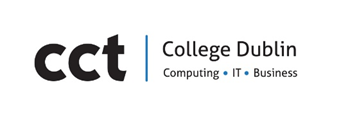


                                        CONTINUOUS ASSESSMENT / ASSIGNMENT;

Programme Title/Year:	BSc Computing in IT Y4;

Module Title(s):	Data Visualization and Communication;

Lecturer Name(s)	Sam Weiss;

Assessment Title:	CA1;

Student Name: Carolina Franco do Prado;

Student Number: 2020354


# Introduction

The following assessment aims to analyze visualization techniques critically in terms of how well they work for various problem domains, choose the best data visualization methods based on the features of the data and the use case and for the data collection (that is the fortune500.csv file provided by the lecturer), suggest, design, create, and implement an interactive data visualisation solution. Throughout the process, provide a detailed explanation of the reasoning behind the strategy and visualisation techniques selected as suggested by the lecturer. The present assessment is following the CCT College Dublin guide lines.




## Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Setting the dataset

In [2]:
df = pd.read_csv("fortune500.csv")

In [3]:
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


# 1. The following data aims to present an insight about how the top 20 companies' Revenue were distributed in 1971. 

### Some data from column Revenue (in millions) are not float, so for the code to work correctly it need to be parse to float and it is done in the line below:

In [4]:
df['Revenue (in millions)'].astype(float). inplace = True

### Replace empty values for "True" in case it exist in the column Year and Revenue (in millions)

In [5]:
df1971 = df[ (df["Year"] == 1971) & (df["Revenue (in millions)"].notna()) ]

### The following line will sum the revenue by company

In [6]:
dfsum = df1971.groupby("Company")["Revenue (in millions)"].sum()

### It will sort the revenue values by descending

In [7]:
dfRevenue = dfsum.reset_index().sort_values("Revenue (in millions)", ascending=False)

### Selecting the 20 top companies

In [8]:
top20=dfRevenue.head(20)

In [9]:
top20

,Company,Revenue (in millions)
205,General Motors,18752.4
171,Exxon Mobil,16554.2
187,Ford Motor,14979.9
200,General Electric,8726.7
266,Intl. Business Machines,7504.0
329,Mobil,7260.5
108,Chrysler,6999.7
252,ITT Industries,6364.5
447,Texaco,6349.8
9,AT&T Technologies,5856.2


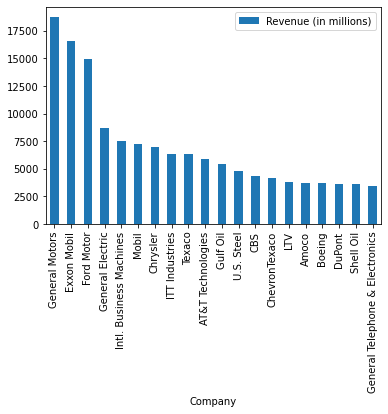

In [10]:
top20.plot(x = "Company", y = "Revenue (in millions)", kind = "bar" );

The plot above aim to compare the revenue from all the 20 companies in 1971 as said previously. The plot using the matplotlib framework was used to give a clear understanding which company was ahead on the race. 

We can clearly see that between the 20 best companies General Motors is the one that was ahead on the marks, with Exxon Mobil after, followed by Ford Motors
______________________________________

# 2. The target of the following data is to present the Top 10 Company’s which had their profit increased the most between 1990 and 1999

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [12]:
df = pd.read_csv("fortune500.csv")

### The column "Profit (in millions)" is a string as shown below, so to be able to calculate it we need to change the data type to float

In [13]:
type("Profit (in millions)")

str

## Change the name of the columns to be easier to type

In [14]:
df.columns = ["year", "rank", "company", "revenue", "profit"]


## Dropping line from the dataset that do not have the profit information 

In [15]:
df = df[df["profit"] != "N.A."]

## Change the column "profit" data type to float

In [16]:
df["profit"] = df["profit"].astype(float)

## Creating a new dataset with the changes in the "profit" column

In [17]:
df.to_csv("dsPM.csv", index=False)

In [18]:
df1 = pd.read_csv("dsPM.csv")

In [19]:
df1.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

## Group by decade and company, and sum the profit

In [20]:
dfdecade = df1.groupby(["profit", "company"])["year"].sum()

In [21]:
dfdecade

profit    company             
-98696.0  Time Warner             2003
-56121.9  JDS Uniphase            2002
-35913.0  Qwest Communications    2003
-23498.3  General Motors          1993
-17462.2  Viacom                  2005
                                  ... 
 17720.0  Exxon Mobil             2001
 17853.0  Citigroup               2004
 21510.0  Exxon Mobil             2004
 22071.0  Ford Motor              1999
 25330.0  Exxon Mobil             2005
Name: year, Length: 24603, dtype: int64

## Sorting "companies" and grouping them

In [22]:
sortcomp= dfdecade.reset_index().sort_values("company", ascending=False).groupby(["company"]).first().reset_index()

In [23]:
sortcomp

,company,profit,year
0,3Com,403.9,2000
1,3M,1430.0,2002
2,A-T-O,9.2,1968
3,A. Schulman,36.1,1991
4,A.H. Robins,58.2,1984
...,...,...,...
1855,Youngstown Sheet & Tube,25.7,1961
1856,Yuba Consolidated Industries,-2.9,1961
1857,Yum Brands,617.0,2004
1858,Zenith Electronics,18.0,1962


## Sorting "profit"

In [24]:
dfProfit = sortcomp.sort_values(["profit"], ascending=False)

In [25]:
dfProfit

,company,profit,year
200,Bank of America Corp.,10810.0,2004
234,Berkshire Hathaway,8151.0,2004
907,Intl. Business Machines,7712.0,2000
1809,Wells Fargo,7014.0,2005
665,Ford Motor,6920.0,1998
...,...,...,...
1180,NTL Europe,-4282.8,2002
1579,State Farm Insurance Cos,-4995.7,2002
300,CIT Group,-6698.7,2003
1042,Lucent Technologies,-16198.0,2002


## Selecting all the years between 1990 to 1999

In [26]:
decade90 = dfProfit[(dfProfit["year"] < 1999) & (dfProfit["year"] > 1990)]

In [27]:
decade90

,company,profit,year
665,Ford Motor,6920.0,1998
379,Citicorp,3788.0,1997
1784,Wal-Mart Stores,3526.0,1998
202,BankAmerica Corp.,3210.0,1998
380,Citigroup,3104.0,1998
...,...,...,...
1249,Nynex,-1849.9,1996
667,Fort Howard,-2052.1,1994
1292,Pacific Telesis Group,-2312.0,1996
369,Chrysler,-2551.0,1994


## From all the 90's decade selecting the top 10 companies

In [28]:
top10=decade90.head(10)

In [29]:
top10

,company,profit,year
665,Ford Motor,6920.0,1998
379,Citicorp,3788.0,1997
1784,Wal-Mart Stores,3526.0,1998
202,BankAmerica Corp.,3210.0,1998
380,Citigroup,3104.0,1998
693,GTE,2798.3,1997
621,Fannie Mae,2725.0,1997
708,General Electric,2636.0,1992
358,Chase Manhattan Corp.,2461.0,1997
1137,Microsoft,2195.0,1997



## Setting a style for the plot using seaborn

In [30]:
sns.set(style="whitegrid")

## Create a bar plot using seaborn to show profit increase for each company

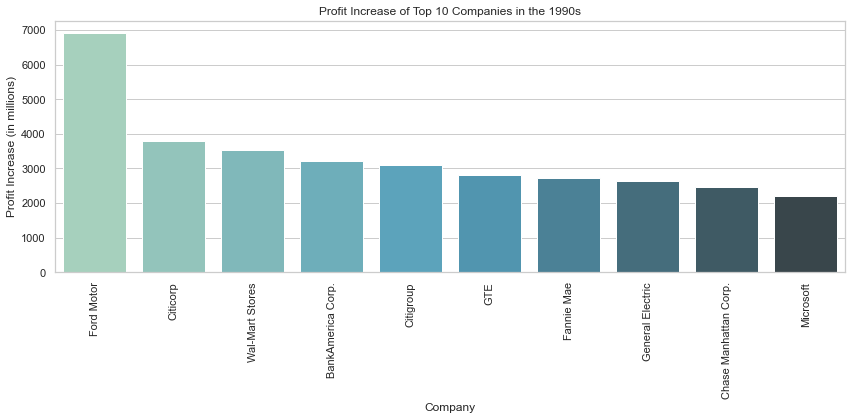

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(x="company", y="profit", data=top10, palette="GnBu_d")
plt.xticks(rotation=90) 
plt.xlabel("Company")
plt.ylabel("Profit Increase (in millions)")
plt.title("Profit Increase of Top 10 Companies in the 1990s")
plt.tight_layout()
plt.show()

This data represents the top 10 companies based on their profits for each year respectively. The information provides insights into the companies that were leading the market in the 1990s. The plot choice was based on the clear visual and that gives us the insight needed in related to the comparison of each company's profit related to the competitors.  


____________________________________

# 3. The following data aim to show the 5 top Companies by Revenue for each Decade.

## Create a decade column by integer-dividing the year by 10 and multiplying by 10

In [32]:
df1 ["Decade"] = (df1["year"] // 10) * 10

In [33]:
df1["Decade"]

0        1950
1        1950
2        1950
3        1950
4        1950
         ... 
25126    2000
25127    2000
25128    2000
25129    2000
25130    2000
Name: Decade, Length: 25131, dtype: int64

## Group data by "Decade" and "Company" and summing the revenues

In [34]:
groupsumr = df1.groupby(['Decade', 'company'])['revenue'].sum().reset_index()

## Sorting "company" values, so we will not have duplicate values

In [35]:
sortcomp= groupsumr.reset_index().sort_values("company", ascending=False).groupby(["company"]).first().reset_index()

## Sorting "revenue" by descending

In [36]:
asc5 = sortcomp.sort_values(by=['revenue'], ascending=False).groupby(["Decade"]).head(5).reset_index(drop=True)

In [37]:
asc5

,company,index,Decade,revenue
0,Wal-Mart Stores,4314,2000,1373311.0
1,Exxon Mobil,3902,2000,1232291.0
2,General Electric,3067,1990,702142.0
3,Citigroup,3819,2000,609631.0
4,ChevronTexaco,3812,2000,533391.0
5,Chrysler,2890,1990,404854.0
6,American Intl. Group,3717,2000,396662.9
7,General Motors,1547,1970,370182.7
8,AT&T,2715,1990,336077.0
9,PepsiCo,3378,1990,242276.3


## Choosing the top 5 by revenue for each "Decade"

In [38]:
top5=asc5.sort_values(by=["Decade"], ascending=True)

In [39]:
top5

,company,index,Decade,revenue
29,Kraft,337,1950,6706.9
27,Texaco,551,1950,10060.1
26,AT&T Technologies,7,1950,10405.7
22,Ford Motor,231,1950,20142.6
28,Amoco,38,1950,9213.0
25,General Telephone & Electronics,894,1960,18006.5
24,General Dynamics,884,1960,18940.8
23,Armour,669,1960,19506.5
21,Boeing,703,1960,21010.4
20,Intl. Business Machines,965,1960,31718.7


## Plot using Matplotlib

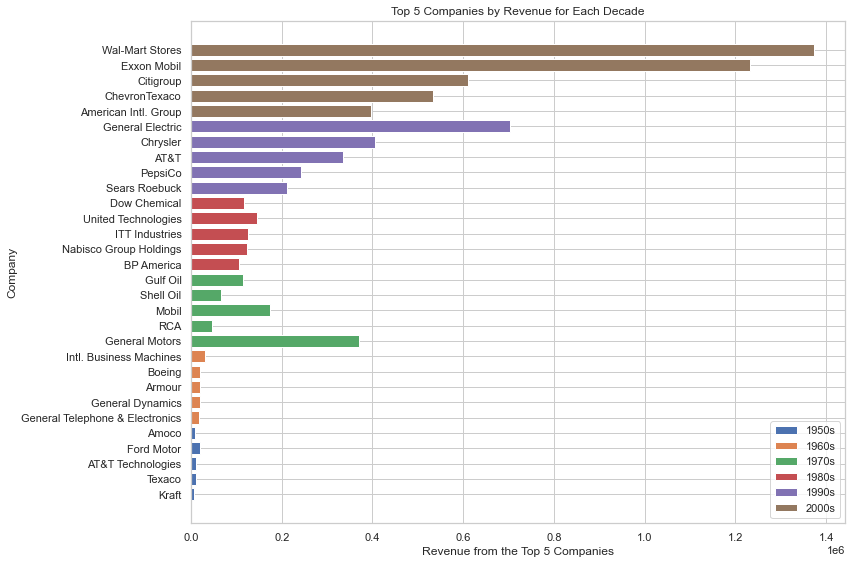

In [40]:
plt.figure(figsize=(12, 8))

for decade, data in top5.groupby('Decade'):
    plt.barh(data['company'], data['revenue'], label=f'{decade}s')

plt.xlabel('Revenue from the Top 5 Companies')
plt.ylabel('Company')
plt.title('Top 5 Companies by Revenue for Each Decade')
plt.legend()
plt.tight_layout()
plt.show()

The plot above provides us the revenue's overview of the top 5 companies in each decade, showing the changing landscape of corporate revenue over the time. The colors on the plot can show the decade what make easy to visualise each company by decade. The axis x is representing the millions in revenue made by the top companies in the first decade of 2000s, those were the main reason of choosing this type of plot. 

____________________________________________________

# 4. The following data aims to show an observation of the average revenue by decade 

### Using the data stored in asc5 we will group it by "Decade" and get the mean of the revenue

In [41]:
meanbydecade = asc5.groupby('Decade')['revenue'].mean()

In [42]:
meanbydecade

Decade
1950     11305.66
1960     21836.58
1970    154200.86
1980    123833.14
1990    379188.66
2000    829057.38
Name: revenue, dtype: float64

## Create a line plot using Matplotlib

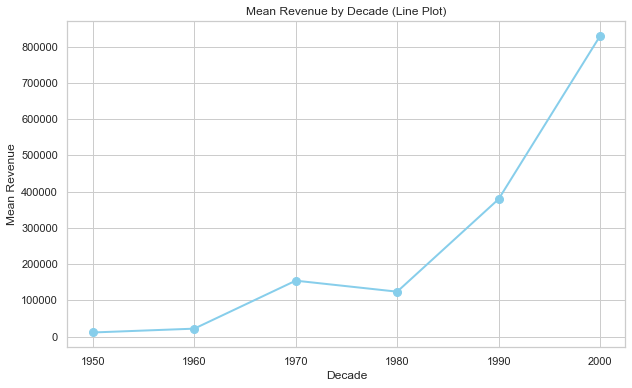

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(meanbydecade.index.astype(str), meanbydecade.values, marker='o', color='skyblue', linewidth=2, markersize=8)
plt.xlabel('Decade')
plt.ylabel('Mean Revenue')
plt.title('Mean Revenue by Decade (Line Plot)')
plt.grid(True)
plt.show()

This information shows the average revenue for each decade. As we move from the 1950s to the 2000s, there is a clear upward trend in the mean revenue, indicating a big increase in the average revenue of companies over the decades. The line plot can represents the trend, with each data point indicating the mean revenue value for the decade that it represents.That is one of the reasons that the type of plot was chose so we can see the information growing through the decade.